In [153]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR

%matplotlib inline

In [154]:
del Data_
Data_ = pd.read_csv("diabetes.csv")

In [155]:
Data_.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [156]:
# for i, sample in enumerate(list(Data_.iterrows()):
#     print(sample)
dataset = []
labels = []

for sample in list(Data_.iterrows()):
#     print(sample[1])
    data_ = torch.tensor([sample[1].BloodPressure, sample[1].Glucose, sample[1].BMI, sample[1].Age, sample[1].Pregnancies])
    label = torch.tensor(sample[1].Outcome)
    dataset.append(data_)
    labels.append(label)

In [157]:
# print(labels[:5])
print(len(dataset))

768


In [118]:
# First Data Augmentation

aug_factor = 0.1
aug_add = 0.05
augmented_dataset = []
augmented_labels = []

for i in range(len(dataset)):
    sample = dataset[i]
    added_sample = sample + (sample * aug_factor) + aug_add
    dataset.append(added_sample)
    labels.append(labels[i])
    sub_sample = sample - (sample * aug_factor) - aug_add
    augmented_dataset.append(sub_sample)
    augmented_labels.append(labels[i])
    print(f"Augmented Sample {i}")
    
aug_dataset = dataset + augmented_dataset
aug_labels = labels + augmented_labels

Augmented Sample 0
Augmented Sample 1
Augmented Sample 2
Augmented Sample 3
Augmented Sample 4
Augmented Sample 5
Augmented Sample 6
Augmented Sample 7
Augmented Sample 8
Augmented Sample 9
Augmented Sample 10
Augmented Sample 11
Augmented Sample 12
Augmented Sample 13
Augmented Sample 14
Augmented Sample 15
Augmented Sample 16
Augmented Sample 17
Augmented Sample 18
Augmented Sample 19
Augmented Sample 20
Augmented Sample 21
Augmented Sample 22
Augmented Sample 23
Augmented Sample 24
Augmented Sample 25
Augmented Sample 26
Augmented Sample 27
Augmented Sample 28
Augmented Sample 29
Augmented Sample 30
Augmented Sample 31
Augmented Sample 32
Augmented Sample 33
Augmented Sample 34
Augmented Sample 35
Augmented Sample 36
Augmented Sample 37
Augmented Sample 38
Augmented Sample 39
Augmented Sample 40
Augmented Sample 41
Augmented Sample 42
Augmented Sample 43
Augmented Sample 44
Augmented Sample 45
Augmented Sample 46
Augmented Sample 47
Augmented Sample 48
Augmented Sample 49
Augmented 

In [119]:
# Second Data Augmentation

aug_factor = 0.1
aug_add = 0.05
augmented_dataset = []
augmented_labels = []

for i in range(len(aug_dataset)):
    sample = aug_dataset[i]
    added_sample = sample + (sample * aug_factor) + aug_add
#     dataset.append(added_sample)
#     labels.append(labels[i])
    sub_sample = sample - (sample * aug_factor) - aug_add
    augmented_dataset.append(sub_sample)
    augmented_labels.append(aug_labels[i])
    print(f"Augmented Sample {i}")
    
aug_dataset = aug_dataset + augmented_dataset
aug_labels = aug_labels + augmented_labels

Augmented Sample 0
Augmented Sample 1
Augmented Sample 2
Augmented Sample 3
Augmented Sample 4
Augmented Sample 5
Augmented Sample 6
Augmented Sample 7
Augmented Sample 8
Augmented Sample 9
Augmented Sample 10
Augmented Sample 11
Augmented Sample 12
Augmented Sample 13
Augmented Sample 14
Augmented Sample 15
Augmented Sample 16
Augmented Sample 17
Augmented Sample 18
Augmented Sample 19
Augmented Sample 20
Augmented Sample 21
Augmented Sample 22
Augmented Sample 23
Augmented Sample 24
Augmented Sample 25
Augmented Sample 26
Augmented Sample 27
Augmented Sample 28
Augmented Sample 29
Augmented Sample 30
Augmented Sample 31
Augmented Sample 32
Augmented Sample 33
Augmented Sample 34
Augmented Sample 35
Augmented Sample 36
Augmented Sample 37
Augmented Sample 38
Augmented Sample 39
Augmented Sample 40
Augmented Sample 41
Augmented Sample 42
Augmented Sample 43
Augmented Sample 44
Augmented Sample 45
Augmented Sample 46
Augmented Sample 47
Augmented Sample 48
Augmented Sample 49
Augmented 

In [159]:
aug_dataset = dataset


In [160]:
len(aug_dataset)

768

In [161]:
# Data Shuffling and Batching
import random 
zipped_dataset = list(zip(aug_dataset, aug_labels))
random.shuffle(zipped_dataset)
dataset, labels = zip(*zipped_dataset)

In [162]:
# Lists to Pytorch Tensors
dataset = torch.stack(dataset)
labels = torch.stack(labels)

In [163]:
# Dataset Shapes, mean , and std
print("Sample set shape: ", dataset.shape)
print("labels (Binary Classes): ", labels.shape)
print()

for dim in range(dataset[:].numpy().shape[1]):
    print(f"Column: {dim} mean: " ,dataset[:][dim].mean())
    print(f"Column: {dim} Standard deviation: " ,dataset[:][dim].std())
    print("-"*50)

Sample set shape:  torch.Size([768, 5])
labels (Binary Classes):  torch.Size([768])

Column: 0 mean:  tensor(42.3200, dtype=torch.float64)
Column: 0 Standard deviation:  tensor(35.1128, dtype=torch.float64)
--------------------------------------------------
Column: 1 mean:  tensor(59.9200, dtype=torch.float64)
Column: 1 Standard deviation:  tensor(59.9152, dtype=torch.float64)
--------------------------------------------------
Column: 2 mean:  tensor(67.1600, dtype=torch.float64)
Column: 2 Standard deviation:  tensor(53.9817, dtype=torch.float64)
--------------------------------------------------
Column: 3 mean:  tensor(63.7600, dtype=torch.float64)
Column: 3 Standard deviation:  tensor(66.7060, dtype=torch.float64)
--------------------------------------------------
Column: 4 mean:  tensor(42.7800, dtype=torch.float64)
Column: 4 Standard deviation:  tensor(32.2024, dtype=torch.float64)
--------------------------------------------------


In [164]:
# Model
class Diabeties_classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.Dense_expand = nn.Linear(5,20)
        self.TransEnc_layer = nn.TransformerEncoderLayer(d_model=20, nhead=5)
        self.Transformer_Encoder = nn.TransformerEncoder(self.TransEnc_layer, num_layers=2)
        self.dropout = nn.Dropout(p=0.005)
        self.Dense_reduce = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()
        self.gelu = nn.GELU()
        self.tanh = nn.Tanh()
        
    def forward(self, input_sequence : torch.Tensor) -> torch.Tensor:
        expanded_sequence = self.Dense_expand(input_sequence)
        expanded_sequence = self.tanh(expanded_sequence)
        expanded_sequence = self.dropout(expanded_sequence)
        encoded_sequence = self.Transformer_Encoder(expanded_sequence)
        encoded_sequence = self.gelu(encoded_sequence)
        encoded_sequence = self.dropout(encoded_sequence)
        reduced_sequence = self.Dense_reduce(encoded_sequence)
        reduced_sequence = self.tanh(reduced_sequence)
        class_ = self.sigmoid(reduced_sequence)
        return class_

In [165]:
dataset.shape

torch.Size([768, 5])

In [166]:
import math
# Data Splits
dataset_size = dataset.numpy().shape[0]
validation_set_size = round(0.1 * dataset.numpy().shape[0])
train_set_size = dataset_size - validation_set_size

# Model init
model = Diabeties_classifier()
# Loss Function : Binary Cross-entropy
loss_function = nn.BCELoss()
# Model learning Rate (d_model_sqrt): Transformers are unstable in training so they need a warmup-stage (Linear Increase
# in the Learning rate, then Square-Root decay)
d_model_sqrt = 3.5e-5  #0.00009
dense_lr = 0.001
# Optimizer : optimizattion Technique, Adam will serve well (Small model + Dataset)
trans_optimizer = torch.optim.AdamW(model.Transformer_Encoder.parameters(), lr=d_model_sqrt)
dense_reduce_optimizer = torch.optim.Adam(model.Dense_reduce.parameters(), lr=dense_lr)
dense_expand_optimizer = torch.optim.Adam(model.Dense_expand.parameters(), lr=dense_lr)

def get_square_inverse_scheduler_warmup(optimizer, num_warmup_steps: int, last_epoch: int = -1):
 
    def lr_lambda(current_step: int):
        if current_step < num_warmup_steps:
            return float(current_step/1) / float(max(1.0, num_warmup_steps))
        #Same Inverse Root Square    
        else:
            return max(
            0.0, 1*float(train_set_size - current_step) / float(max(1, train_set_size - num_warmup_steps))
        )
        
    return LambdaLR(trans_optimizer, lr_lambda, last_epoch=last_epoch, verbose=False)

EPOCHS = 5

warmed_scheduler = get_square_inverse_scheduler_warmup(trans_optimizer, 
                                            num_warmup_steps= train_set_size * EPOCHS * (1/10),
                                                       last_epoch = -1)
dense_reduce_scheduler = get_square_inverse_scheduler_warmup(dense_reduce_optimizer,\
                                            num_warmup_steps=train_set_size * EPOCHS * (1/3),
                                                      last_epoch=-1)
dense_expand_scheduler = get_square_inverse_scheduler_warmup(dense_expand_optimizer,\
                                            num_warmup_steps=train_set_size * EPOCHS * (1/3),
                                                      last_epoch=-1)
# Training hyperparameters
# 1 Sample/Iteration Training (Small Dataset)

# Train Loss
Train_losses = []
# Validation Loss
Val_losses = []
# Training Accuracy
Train_acc = []
# val_accuracy
Val_acc = []

train_total_init = 0
train_correct = 0
val_total_init = 0
val_correct = 1
train_total = train_set_size
val_total = validation_set_size

r'''
TODO: Hyperparameter Search, Data Augmentation ... 
'''

'\nTODO: Hyperparameter Search, Data Augmentation ... \n'

In [168]:
# Training Loop

for epoch in range(EPOCHS):
    
#     train_total = train_total_init * (epoch+1)
    model.train()
    
    for iter_, (sample, label) in enumerate(zip(dataset[:train_set_size], labels[:train_set_size])):
        trans_optimizer.zero_grad()
        dense_expand_optimizer.zero_grad()
        dense_reduce_optimizer.zero_grad()
        output = model(sample.reshape(1,-1).float())
        loss = loss_function(output.reshape(1), label.reshape(1).float())
        Train_losses.append(loss.item())
        loss.backward()
        trans_optimizer.step()
        dense_reduce_optimizer.step()
        dense_expand_optimizer.step()
        warmed_scheduler.step()
        torch.nn.utils.clip_grad_norm(parameters=model.Transformer_Encoder.parameters(), 
                                      max_norm=1, norm_type=2.0)
        torch.nn.utils.clip_grad_norm(parameters=model.Dense_expand.parameters(), 
                                      max_norm=10, norm_type=2.0)
        
        torch.nn.utils.clip_grad_norm(parameters=model.Dense_reduce.parameters(), 
                                      max_norm=10, norm_type=2.0)
        
        if output.squeeze().item() >= 0.5:
            train_output = 1
        else:
            train_output = 0
            
        if train_output == label.squeeze().item():
            train_correct += 1

        if iter_ % 50 == 0:
            model.eval()
            count = 0 
            for val_iter_, (val_sample, val_label) in enumerate(zip(dataset[train_set_size:], 
                                                                    labels[train_set_size:])):
#                 print(val_sample)
#                 break
                val_output = model(val_sample.reshape(1,-1).float())
                val_loss = loss_function(val_output.reshape(1), label.reshape(1).float())
                Val_losses.append(val_loss.item())
                if val_output.squeeze().item() >= 0.5:
                    val_out = 1
                else:
                    val_out = 0
                if val_out == val_label.squeeze().item():
                    count += 1
                    val_correct += 1
                
            train_accuracy = train_correct / 50
            Train_acc.append(train_accuracy)
            train_correct = 0
            
            val_accuracy = val_correct/validation_set_size
            Val_acc.append(val_accuracy)
            val_correct = 0 

            print()
            print(f"|EPOCH: {epoch+1}|")
            print("-"*60)

            print("Training_Loss: ", np.array(Train_losses).mean())
            print("Training_Accuracy: ", np.array(Train_acc).mean())
            print("-" * 60)
            print()

#             print("Validation_Loss: ", np.array(Val_losses).mean())
#             print("validation_Accuracy: ", np.array(Val_acc).mean())
            print("Validation_Loss: ", Val_losses[-1])
            print("validation_Accuracy: ", Val_acc[-1])
            print("-" * 60)
            print()

/tmp/ipykernel_75903/1078128947.py:20: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=model.Transformer_Encoder.parameters(),
/tmp/ipykernel_75903/1078128947.py:22: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=model.Dense_expand.parameters(),
/tmp/ipykernel_75903/1078128947.py:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=model.Dense_reduce.parameters(),



|EPOCH: 1|
------------------------------------------------------------
Training_Loss:  0.6723398694964234
Training_Accuracy:  0.3971428571428572
------------------------------------------------------------

Validation_Loss:  0.46381527185440063
validation_Accuracy:  0.6623376623376623
------------------------------------------------------------


|EPOCH: 1|
------------------------------------------------------------
Training_Loss:  0.6769385875630456
Training_Accuracy:  0.42000000000000004
------------------------------------------------------------

Validation_Loss:  1.0981203317642212
validation_Accuracy:  0.6883116883116883
------------------------------------------------------------


|EPOCH: 1|
------------------------------------------------------------
Training_Loss:  0.6799503203366651
Training_Accuracy:  0.42888888888888893
------------------------------------------------------------

Validation_Loss:  1.0272438526153564
validation_Accuracy:  0.6883116883116883
------------


|EPOCH: 2|
------------------------------------------------------------
Training_Loss:  0.6295120666081405
Training_Accuracy:  0.6019354838709677
------------------------------------------------------------

Validation_Loss:  0.3423466682434082
validation_Accuracy:  0.5844155844155844
------------------------------------------------------------


|EPOCH: 2|
------------------------------------------------------------
Training_Loss:  0.6261401489595864
Training_Accuracy:  0.6075
------------------------------------------------------------

Validation_Loss:  0.33507680892944336
validation_Accuracy:  0.5844155844155844
------------------------------------------------------------


|EPOCH: 2|
------------------------------------------------------------
Training_Loss:  0.6241852215825742
Training_Accuracy:  0.6115151515151515
------------------------------------------------------------

Validation_Loss:  0.3298833668231964
validation_Accuracy:  0.6233766233766234
--------------------------


|EPOCH: 4|
------------------------------------------------------------
Training_Loss:  0.6163618176722254
Training_Accuracy:  0.6370909090909092
------------------------------------------------------------

Validation_Loss:  0.33169376850128174
validation_Accuracy:  0.6233766233766234
------------------------------------------------------------


|EPOCH: 4|
------------------------------------------------------------
Training_Loss:  0.616002871251818
Training_Accuracy:  0.6389285714285714
------------------------------------------------------------

Validation_Loss:  0.332054078578949
validation_Accuracy:  0.6363636363636364
------------------------------------------------------------


|EPOCH: 4|
------------------------------------------------------------
Training_Loss:  0.6151961909763979
Training_Accuracy:  0.6403508771929824
------------------------------------------------------------

Validation_Loss:  0.32962602376937866
validation_Accuracy:  0.6233766233766234
---------------

In [169]:
torch.save(model.state_dict(),"Diabeties__1.pt")

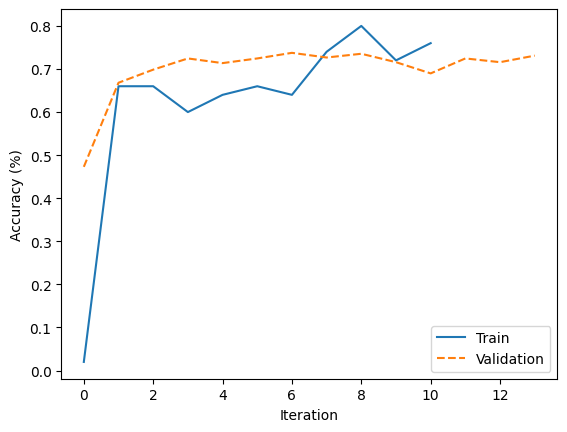

In [145]:
plt.plot(Train_acc[::40],"-", label="Train")
plt.plot(Val_acc[::30],"--", label="Validation")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend(loc='lower right')
plt.savefig("Accuracies.png", bbox_inches='tight')

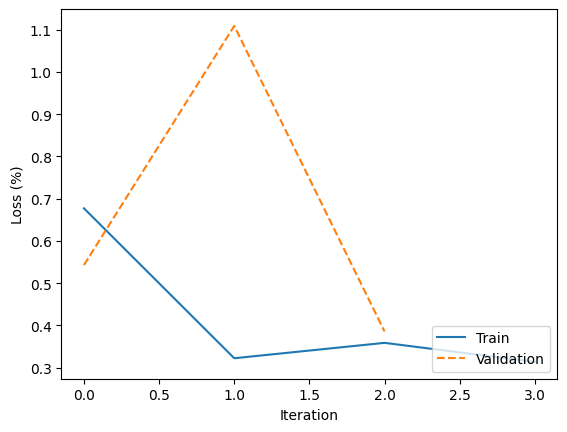

In [141]:
plt.plot(Train_losses[::5500],"-", label="Train")
plt.plot(Val_losses[::80010],"--", label="Validation")
plt.xlabel("Iteration")
plt.ylabel("Loss (%)")
plt.legend(loc='lower right')
# plt.savefig("Losses.png", bbox_inches='tight')

In [641]:
model_test = Diabeties_classifier()